# <span style='background-color:#fff5b1'>GAN (Generative Adversarial Network-생성적 적대 신경망)</span>
- 2014년 Ian Goodfellow가 발표한 딥러닝을 이용한 생성모델

## GAN 개요
### Generative (생성적) 
- GAN은 생성모델임. 생성모델이란 그럴듯한 가짜를 만들어내는 모델을 말한다. 
- 그럴듯하단의 수학적 의미: 실제 데이터의 분포와 비슷한 분포를 가지는 데이터
- 32 X 32 X 3 크기의 사진을 이용한 생성모델의 경우 총 변수가 3072개로 그 조합에 따라 다양한 형태가 나온다. 만약 사람의 얼굴이미지를 생성하겠다면 사람 얼굴 처럼 보이는 픽셀값들의 조합의 분포를 찾아내는 것을 말한다.

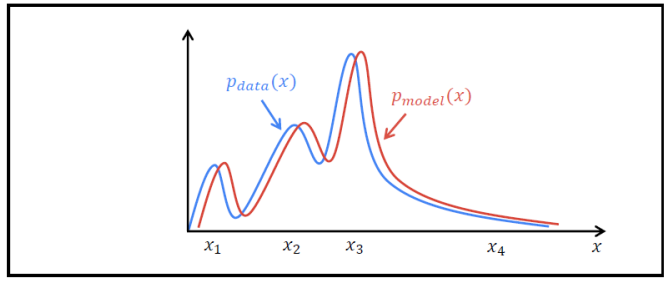

<center>$P_{data}(x)$: 실제 이미지의 분포, $P_{model}(x)$: 모델이 생성한 이미지의 분포

In [1]:
32 * 32 * 3

3072

### <span style='background-color:#fff5b1'>Adversairal (적대적) - 두개의 모델을 적대적으로 경쟁시켜 두 모델을 성능을 높인다. 
- 위조지폐범과 위조지폐를 판별하는 경찰간의 관계
- 위조지폐범은 경찰을 속이기 위해 점점 위조 기술을 발전시키고 경찰은 위조지폐를 찾기위해 위폐를 식별하는 기술을 발전 시킨다. 서로의 기술을 발전시키다보면 위조지폐범의 위폐 제조 기술은 완벽해질 것이다.
- 이때 GAN에서 위조지폐범을 **Generator-생성자** 라고 하고 경찰을 **Discriminator-판별자** 모델이라고 하며 이 둘을 경쟁적으로 학습을 시킨다.
- Generator의 목적은 진짜같은 가짜를 만드는 것이며 Discriminator는 Generator가 만든 가짜를 진짜와 구분하는 것으로 둘을 함께 학습 시키면 **"진짜와 구별이 안되는 가짜를 만드는 Generator 모델을 만들 수있다"** 는 것이 GAN의 Adversarial Trainning의 개념이다.

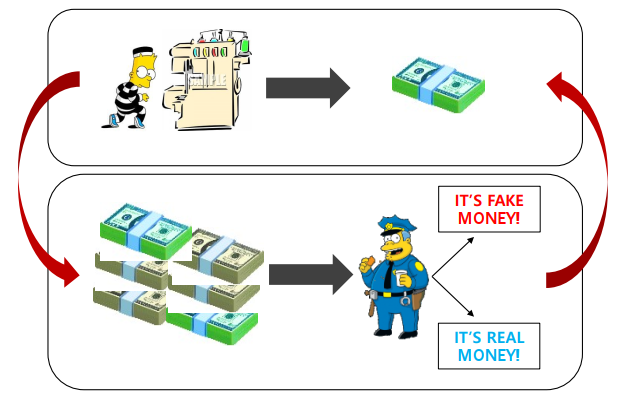

## <span style='background-color:#fff5b1'>Generator와 Discriminator 네트워크
- ### Generator
    - 입력: 랜덤한 숫자로 구성된 벡터(잡음)
    - 출력: 최대한 진짜 처럼 보이는 가짜 샘플
    - 목표: 훈련 데이터셋에 있는 샘플과 구별이 불가능한 가짜 샘플만들기
- ### Discriminator
    - 입력
        1. 훈련데이터셋에 있는 진짜 샘플
        2. Generator가 생성한 가짜 샘플
    - 출력: 입력 샘플이 진짜일 예측 확률
    - 목표: 생성자가 만든 가짜 샘플과 훈련 데이터셋의 진짜 샘플을 구별하기

## 훈련

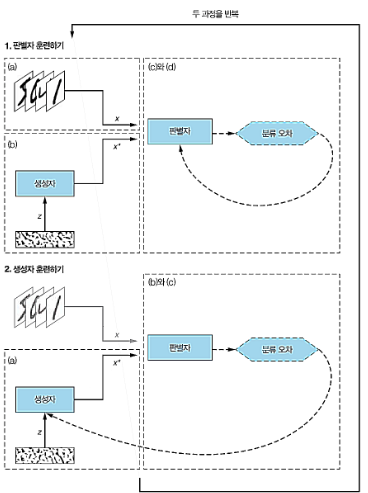
<center>[참조] GANS in Action</center>


### 판별자 훈련
- 위: 진짜
- 아래: 잡음 => 가짜
- 분류 오차 => 판별자 학습

### 생성자 훈련
- 위: 진짜
- 아래: 잡음 => 가짜
- 분류 오차 => 생성자 학습

#### 모든 과정이 한번씩 돌아가면서 균등하게 학습한다. / 한쪽이 학습이 끝난 이후 다른 한쪽 학습X

- Discriminator 훈련
    - 진짜 샘플과 Generator가 생성한 가짜 샘플을 학습한다.
- Generator 훈련
    - 생성한 가짜 샘플의 Label을 진짜로 하여 학습한다. 
    - Discriminator가 진짜로 판별하면 손실이 적어 져서(가짜를 진짜로 판단했으므로 generator입장에서는 성공이므로 적은 손실을 발생시킨다.) Generator의 파라미터가 적게 업데이트 될 것이고 가짜로 판별하면 손실이 커져 Generator의 파라미터가 크게 업데이트 되어 다음 샘플 생성시 좀더 진짜 sample에 가깝게 생성하게 된다.

## GAN 응용
- 실제 사진과 동일한 수준의 이미지 생성
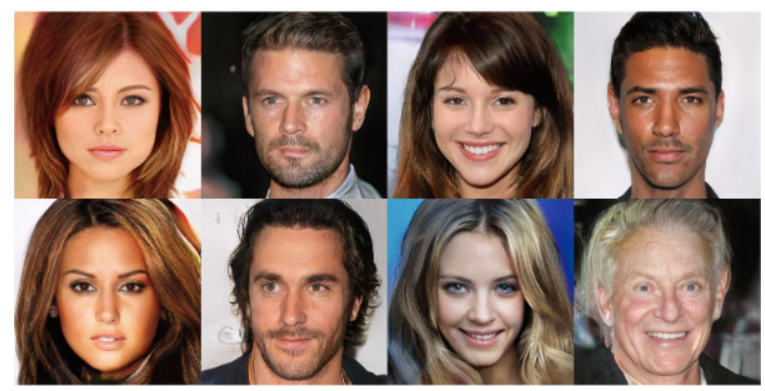
- Image to Image 변환 (Style Transfer)
    - 한 도메인내의 이미지를 다른 도메인의 이미지로 변환 
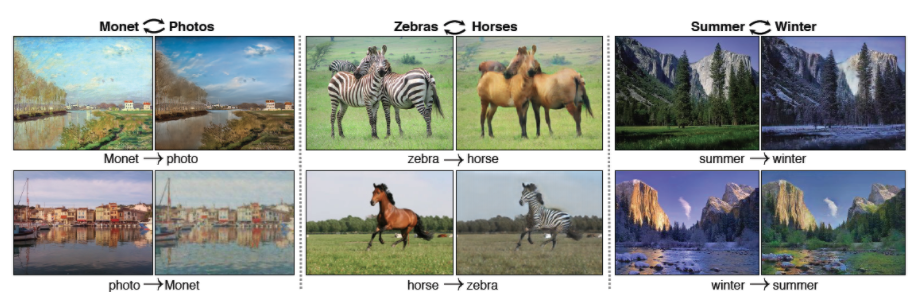

- 추천 ITEM 생성
    - 패션 카테고리의 추천 시스템에 GAN을 이용하여 수많은 의상을 분석해 주어진 스타일에 어울리는 새로운 아이템을 생성
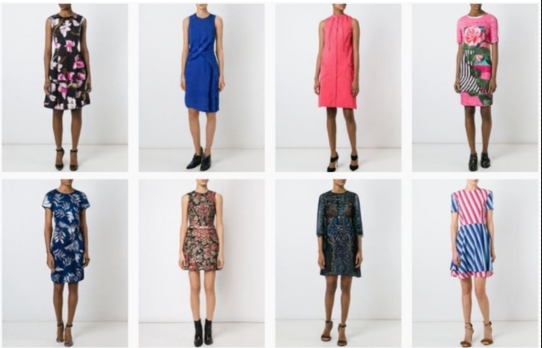    
- 데이터셋 증가
    - 의료 연구에서 진단 정확도 개선을 위해 GAN을 이용해 생성한 데이터로 데이터셋을 증가